In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import pandas as pd
import string
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize
from nltk.corpus import wordnet
from nltk.tag import PerceptronTagger
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssaba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssaba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ssaba\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
input_file_path = 'reviews.txt'
columns = [
    "beer_name", "beer_id", "brewery_name", "brewery_id", "style", "abv", "date",
    "user_name", "user_id", "appearance", "aroma", "palate", "taste",
    "overall", "rating", "text"
]

data_frames = []

chunk_size = 1000000  
with open(input_file_path, 'r') as file:
    while True:
        content = file.read(chunk_size)
        if not content:
            break  
        paragraphs = content.split('\n\n')
        paragraphs = [para.strip() for para in paragraphs if para.strip()]

        data_list = []  
        for paragraph in paragraphs:
            data_dict = {}
            for line in paragraph.split('\n'):
                if ':' in line:
                    key, value = line.split(':', 1)
                    data_dict[key.strip()] = value.strip()
           
            if data_dict:
                data_list.append(data_dict)

        if data_list: 
            chunk_df = pd.DataFrame(data_list, columns=columns)
            data_frames.append(chunk_df)

if data_frames:
    final_df = pd.concat(data_frames, ignore_index=True)




In [154]:
df_cleaned = final_df.dropna()
df_cleaned.shape

(2588835, 16)

In [156]:
df_cleaned2 = df_cleaned.drop_duplicates()
df_cleaned2.shape

(2588835, 16)

In [157]:
new_df_clean = df_cleaned[df_cleaned['rating'].apply(float)<3]
new_df_clean.shape

(220373, 16)

In [158]:
def preprocess(text):
    text = text + "."	
    custom_pattern = r'[^.!?;]+(?:\s*-\s*)?[^.!?;]+[.!?;]*'
    sentences = regexp_tokenize(text, custom_pattern)
    punctuation_to_remove = string.punctuation.replace("'", "")
    translator = str.maketrans(punctuation_to_remove, ' ' * len(punctuation_to_remove))
    stop_words = set(stopwords.words('english')) - {'not', 'no', 'never'}
    s = []
    final_toks = []
    final_toks2 = []
    final_adjs = []
    final_adjs2 = []
    tagger = PerceptronTagger()
    for i in sentences:
        adjs = []
        text = i.translate(translator)
        tokens1 = word_tokenize(text)
        tokens = [word.lower() for word in tokens1 if word.lower() not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in tokens]
        tagged_tokens = pos_tag(tokens)
        new_tag = [(word, tag) for word, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('JJ') or tag.startswith('RB') or tag.startswith('VB')]
        
        stack = []
        for j in np.arange(len(new_tag)-1, -1, -1):
            stack.append(new_tag[j])
        a = ""	
        while len(stack) > 0:
            if len(stack) == 1:
                a = a + " " + stack[-1][0]
                adjs.append(a.strip())
                stack.pop()
            elif stack[-1][1].startswith('NN'):
                a = a + " " + stack[-1][0]
                adjs.append(a.strip())
                stack.pop()
                a = ""
            elif stack[-1][1].startswith('JJ') or stack[-1][1].startswith('RB'):
                a = a + " " + stack[-1][0]
                stack.pop()
            else:
                stack.pop()
                
        filtered_tokens1 = [word for word, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('JJ') or tag.startswith('RB') or tag.startswith('VB')]
    
        if len(filtered_tokens1) > 0:
            filtered_tokens = [token for token in filtered_tokens1 if token.isalpha()]
            final_toks.append(filtered_tokens)
            final_toks2.extend(filtered_tokens)
            final_adjs.append(adjs)
            final_adjs2.extend(adjs)

    return final_toks, final_toks2, final_adjs, final_adjs2

i = 0
text = new_df_clean.iloc[i]['text']
processed_text1, processed_text2, adj1, adj2 = preprocess(text)
print(processed_text1)
print(processed_text2)
print(adj1)
print(adj2)
print(new_df_clean.iloc[i]['rating'])
print(new_df_clean.iloc[i]['text'])
	


[['bottle', 'pour', 'piss', 'yellow', 'color', 'fizzy', 'white', 'head'], ['carbonate', 'similar', 'soda'], ['nose', 'basic'], ['malt', 'corn', 'little', 'floral', 'earthy', 'straw'], ['flavor', 'not', 'offensive', 'bore'], ['taste', 'little', 'corn', 'grain'], ['hard', 'write', 'review', 'something', 'simple'], ['ok', 'way', 'worse']]
['bottle', 'pour', 'piss', 'yellow', 'color', 'fizzy', 'white', 'head', 'carbonate', 'similar', 'soda', 'nose', 'basic', 'malt', 'corn', 'little', 'floral', 'earthy', 'straw', 'flavor', 'not', 'offensive', 'bore', 'taste', 'little', 'corn', 'grain', 'hard', 'write', 'review', 'something', 'simple', 'ok', 'way', 'worse']
[['pour piss', 'yellow color', 'fizzy white head'], ['carbonate', 'similar soda'], ['nose basic'], ['malt', 'corn', 'little floral earthy straw'], ['flavor', 'not offensive bore'], ['taste', 'little corn', 'grain'], ['hard write', 'review', 'something', 'simple'], ['ok', 'way', 'worse']]
['pour piss', 'yellow color', 'fizzy white head', '

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
n = 1000
tokenized_texts = [preprocess(new_df_clean.iloc[i]['text'])[1] for i in np.arange(0, n)]
tokenized_texts_joined = [" ".join(tokens) for tokens in tokenized_texts]
vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_matrix = vectorizer.fit_transform(tokenized_texts_joined)
feature_names = vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

term_frequencies = np.sum(tfidf_array, axis=0)
word_frequency_df = pd.DataFrame(list(zip(feature_names, term_frequencies)), columns=["Word", "TF"])

print("Most frequent words based on TF scores:")
f_words = word_frequency_df.sort_values(by="TF", ascending=False)
f_words.head(10)


Most frequent words based on TF scores:


,Word,TF
132297,not,16.007619
15924,beer,15.879327
191065,taste,13.638723
116990,malt,10.474749
95194,hop,10.474388
108806,light,10.057743
89055,head,9.912927
174093,smell,9.739786
72667,flavor,9.272239
187010,sweet,9.017911


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

n = 1000
tokenized_texts = [preprocess(new_df_clean.iloc[i]['text'])[3] for i in np.arange(0, n)]
tokenized_texts_joined = [" ".join(tokens) for tokens in tokenized_texts]
vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_matrix = vectorizer.fit_transform(tokenized_texts_joined)
feature_names = vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

term_frequencies = np.sum(tfidf_array, axis=0)
word_frequency_df = pd.DataFrame(list(zip(feature_names, term_frequencies)), columns=["Word", "TF"])

print("Most frequent words based on TF scores:")
f_adj = word_frequency_df.sort_values(by="TF", ascending=False) 
f_adj.head(10)


Most frequent words based on TF scores:


,Word,TF
14963,beer,16.780258
120077,not,16.766401
173182,taste,13.831733
86304,hop,10.811676
105348,malt,10.486590
80556,head,10.288826
98411,light,9.800744
66345,flavor,9.509654
157635,smell,9.278129
20858,bite,9.209640


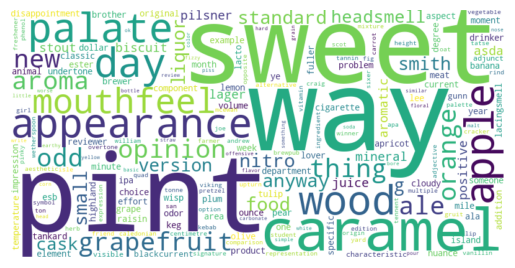

In [138]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter

n = 1000
tokenized_texts = [preprocess(new_df_clean.iloc[i]['text'])[1] for i in np.arange(0, n)]
all_tokens = [token for text in tokenized_texts for token in text]
bigrams = ngrams(all_tokens, 1)
bigram_freq = Counter(bigrams)
threshold = bigram_freq.most_common(1)[0][1]*0.8
filtered_counter = Counter({word: freq for word, freq in bigram_freq.items() if freq <= threshold})
bigram_strings = [' '.join(b) for b in filtered_counter.keys()]


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(bigram_strings))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [159]:
n = 1000
tokenized_texts = [preprocess(new_df_clean.iloc[i]['text'])[1] for i in np.arange(0, n)]
all_tokens = [token for text in tokenized_texts for token in text]
bigrams = ngrams(all_tokens, 2)
bigram_freq = Counter(bigrams)
threshold = bigram_freq.most_common(1)[0][1]*0.8
filtered_counter = Counter({word: freq for word, freq in bigram_freq.items() if freq <= threshold})
filtered_counter

Counter({('not', 'much'): 132,
         ('medium', 'body'): 91,
         ('not', 'good'): 82,
         ('pint', 'glass'): 76,
         ('beer', 'not'): 64,
         ('beer', 'pour'): 61,
         ('light', 'body'): 56,
         ('roast', 'malt'): 55,
         ('not', 'bad'): 54,
         ('pour', 'dark'): 53,
         ('sweet', 'malt'): 52,
         ('pour', 'clear'): 49,
         ('caramel', 'malt'): 49,
         ('pale', 'ale'): 47,
         ('lace', 'smell'): 46,
         ('finger', 'head'): 46,
         ('tan', 'head'): 45,
         ('head', 'smell'): 44,
         ('amber', 'color'): 44,
         ('not', 'sure'): 43,
         ('little', 'bite'): 39,
         ('smell', 'taste'): 39,
         ('medium', 'carbonation'): 38,
         ('bottle', 'pour'): 35,
         ('taste', 'not'): 35,
         ('beer', 'taste'): 34,
         ('not', 'really'): 34,
         ('scotch', 'ale'): 34,
         ('hop', 'taste'): 33,
         ('thin', 'white'): 33,
         ('head', 'leave'): 33,
         (

In [160]:
n = 1000
tokenized_texts = [preprocess(new_df_clean.iloc[i]['text'])[3] for i in np.arange(0, n)]
all_tokens = [token for text in tokenized_texts for token in text]
bigrams = ngrams(all_tokens, 2)
bigram_freq = Counter(bigrams)
threshold = bigram_freq.most_common(1)[0][1]
filtered_counter = Counter({word: freq for word, freq in bigram_freq.items() if freq <= threshold})
filtered_counter

Counter({('medium', 'body'): 62,
         ('pour', 'dark'): 43,
         ('beer', 'pour'): 41,
         ('pint', 'glass'): 41,
         ('medium', 'carbonation'): 30,
         ('roast', 'malt'): 30,
         ('smell', 'taste'): 27,
         ('hop', 'taste'): 23,
         ('caramel', 'malt'): 23,
         ('finger', 'head'): 21,
         ('mouthfeel', 'medium'): 18,
         ('lace', 'smell'): 18,
         ('half', 'pint'): 18,
         ('pour', 'bottle'): 17,
         ('malt', 'hop'): 17,
         ('bitter', 'hop'): 17,
         ('amp', 'gunn'): 16,
         ('body', 'medium'): 15,
         ('review', 'note'): 15,
         ('light medium', 'body'): 15,
         ('beer', 'taste'): 14,
         ('hop', 'flavor'): 14,
         ('pour', 'light'): 13,
         ('color', 'head'): 13,
         ('light', 'body'): 13,
         ('tan', 'head'): 13,
         ('dark', 'fruit'): 13,
         ('innis', 'amp'): 13,
         ('color', 'finger'): 12,
         ('malt', 'taste'): 12,
         ('hop', 'pr